In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sns.set()

In [2]:
df = pd.read_csv('winequality-red.csv',delimiter=';')

# EDA

## Basics

In [3]:
print(df.shape)

(1599, 12)


In [4]:
print(df.columns)
features = df.columns.to_list()
features.remove('quality')
X = df[features]
y = df['quality']

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Missing Values

In [7]:
df.apply(lambda x: sum(x.isnull()))

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Correlation

In [8]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Histograms

<Figure size 432x288 with 0 Axes>

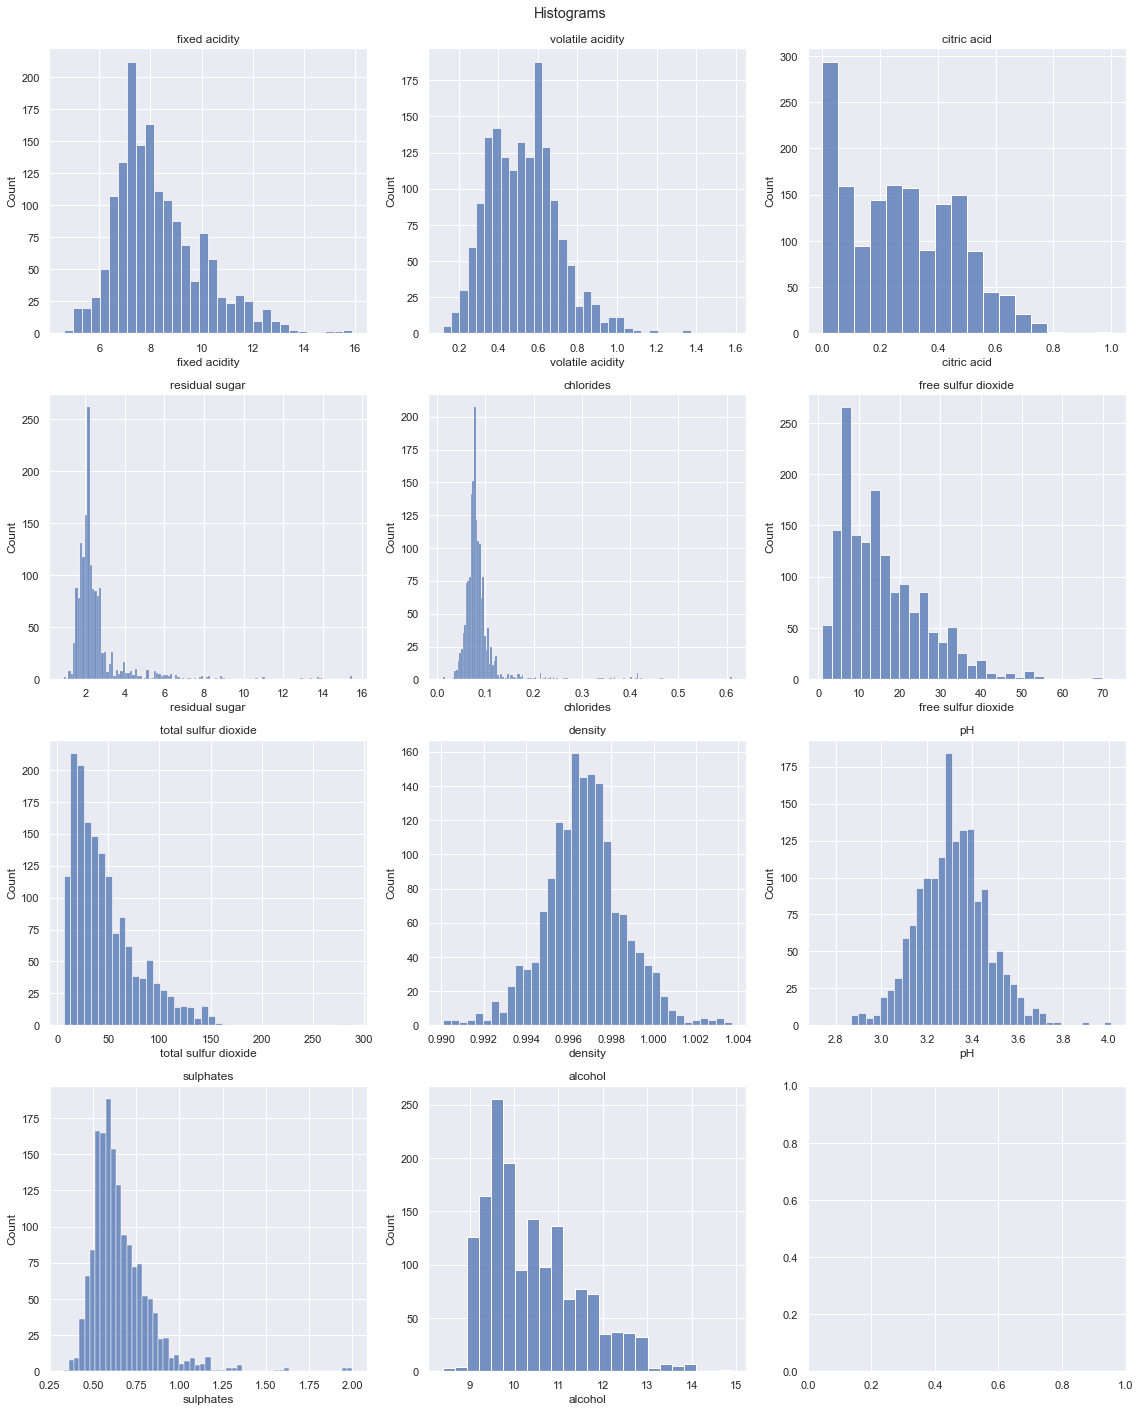

In [9]:
plt.clf()
nrows, ncols = 4,3
fig, axes = plt.subplots(nrows,ncols,figsize=(16,20))
fig.suptitle("Histograms\n")
for i in range(len(features)):
    row = i//ncols
    col = i - row*ncols
    axes[row][col].set_title(features[i])
    sns.histplot(data=df, x=features[i], ax=axes[row, col])
fig.tight_layout()
plt.show()

## Scatterplots

<Figure size 432x288 with 0 Axes>

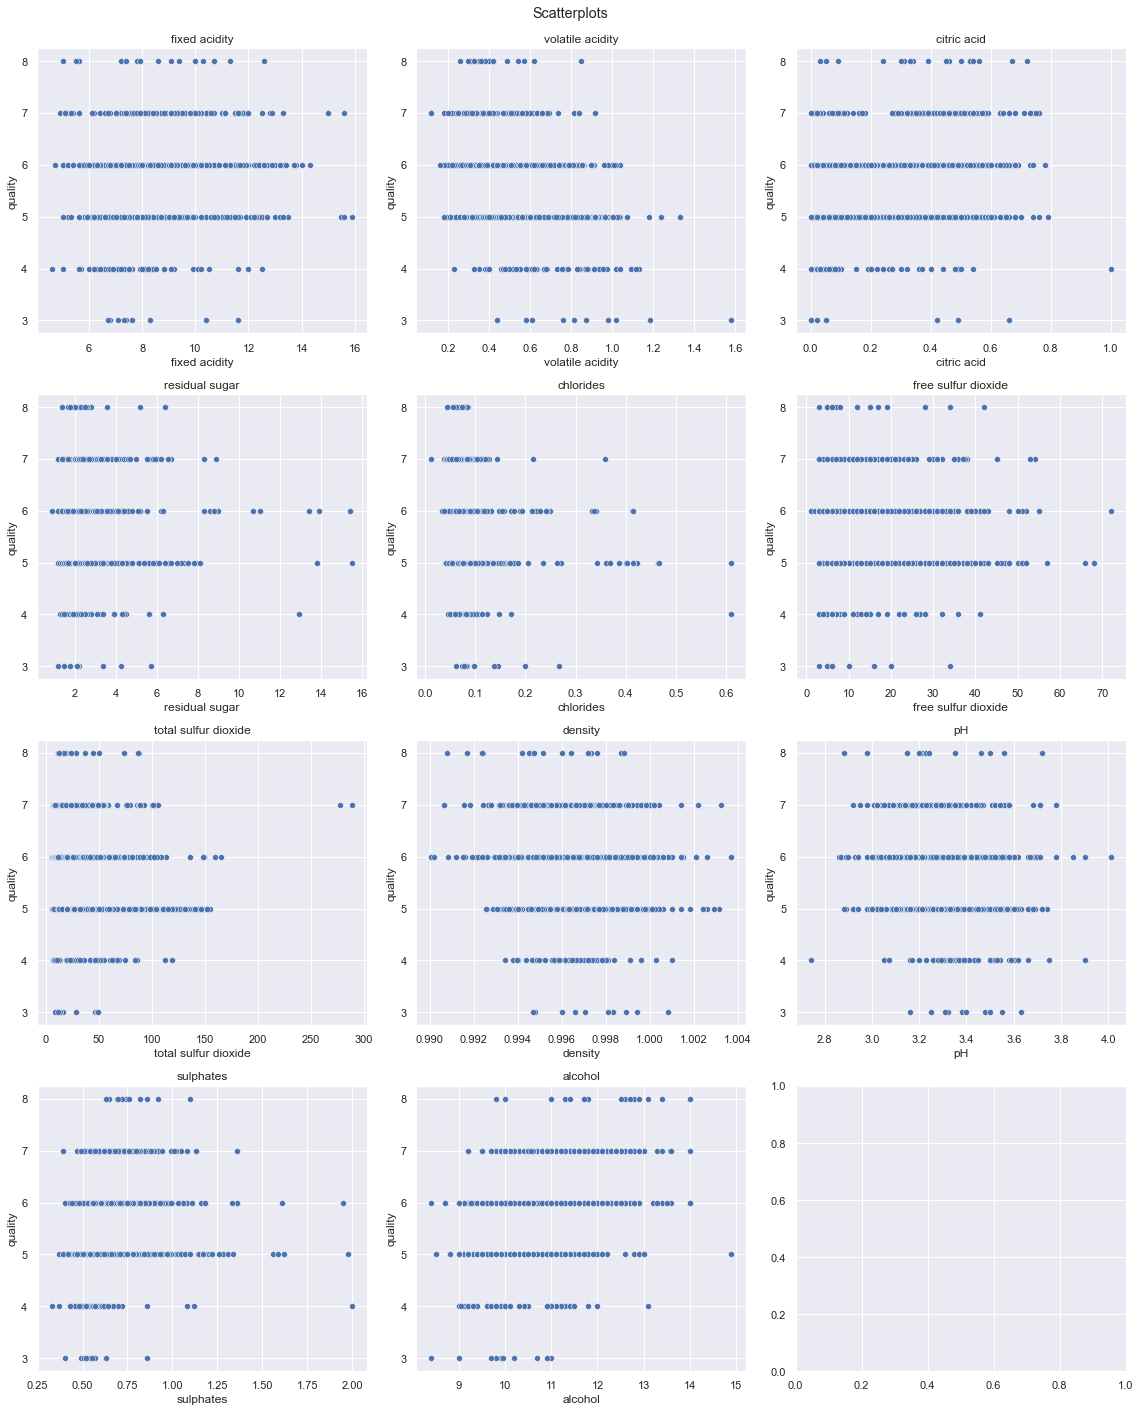

In [10]:
plt.clf()
nrows, ncols = 4,3
fig, axes = plt.subplots(nrows,ncols,figsize=(16,20))
fig.suptitle("Scatterplots\n")
for i in range(len(features)):
    row = i//ncols
    col = i - row*ncols
    axes[row][col].set_title(features[i])
    sns.scatterplot(data=df, x=features[i], y='quality', ax=axes[row, col])
fig.tight_layout()
plt.show()

# Model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
model.intercept_

14.355105195764924

In [20]:
model.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [21]:
model.score(X_train,y_train)

0.3479926193529862

In [22]:
model.score(X_test,y_test)

0.4031803412796223

In [28]:
Xtrain_w_intercept = sm.add_constant(X_train)
modelsm = sm.OLS(y_train,Xtrain_w_intercept).fit()
print(modelsm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Mon, 19 Apr 2021   Prob (F-statistic):          1.48e-109
Time:                        20:32:19   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.3551 

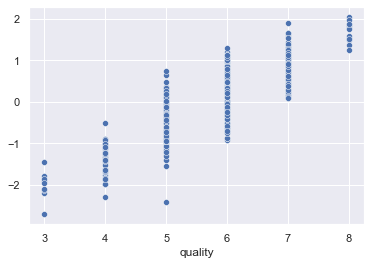

In [34]:
y_train_predictions = modelsm.predict(Xtrain_w_intercept)
residuals = y_train - y_train_predictions

plt.clf()
sns.scatterplot(x=y_train,y=residuals)
plt.show()

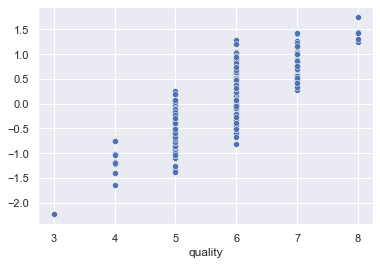

In [33]:
Xtest_w_intercept = sm.add_constant(X_test)
results_oos = modelsm.predict(Xtest_w_intercept)
residuals = y_test-results_oos

plt.clf()
sns.scatterplot(x=y_test,y=residuals)
plt.show()